## 18Oの状態作成回路

valenceを16Oとして、$M=0$となる核子pairに1つのqubitが割り振られる。
モデル空間はsd-shellである。
したがって、$s_{1/2}$の$|j_{z}|=1/2$、$d_{3/2}$の$|j_{z}|=1/2,3/2$、$d_{5/2}$の$|j_{z}|=1/2,3/2,5/2$の6パターン存在する。

以下、$|000001\rangle,\cdots,|100000\rangle$の重ね合わせ状態を作る回路の作成を行う。

In [1]:
import sys
#! pip install pylatexenc
import numpy as np
from scipy import linalg
import sympy
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.synthesis import SuzukiTrotter
import seaborn as sns
from tqdm import tqdm
from qiskit_aer.primitives import SamplerV2
from qiskit.primitives import StatevectorSampler


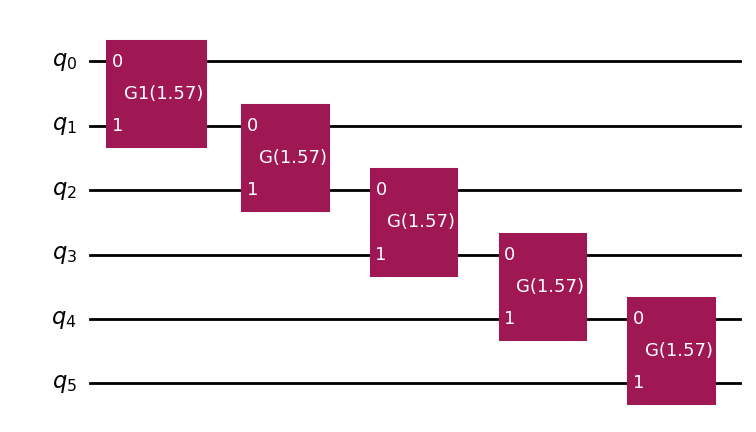

In [2]:
def G1(theta):
    theta = theta * 2
    circ = QuantumCircuit(2)
    circ.x(0)
    circ.ry(theta, 1)
    circ.cx(1, 0)
    circ.name = f'G1({theta:.2f})'
    return circ.to_gate()

def G(theta):
    theta = theta * 2
    circ = QuantumCircuit(2)
    circ.cry(theta, 0, 1)
    circ.cx(1, 0)
    circ.name = f'G({theta:.2f})'
    return circ.to_gate()

params = [np.pi/4, np.pi/4,np.pi/4, np.pi/4, np.pi/4, np.pi/4]
qc = QuantumCircuit(6)
qc.append(G1(params[0]), [0, 1])
qc.append(G(params[1]), [1, 2])
qc.append(G(params[2]), [2, 3])
qc.append(G(params[3]), [3, 4])
qc.append(G(params[4]), [4, 5])
qc.draw('mpl')


In [3]:
state_vector = Statevector.from_instruction(qc)
state_vector
state_vector.draw('latex')

<IPython.core.display.Latex object>